**<h2>NFL Statistics: Individual</h2>**

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/millerolson/Desktop/yearly_data_updated_08_23.csv")
data

,id,name,position,team,season,season_type,completions,attempts,passing_yards,passing_tds,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
0,1,A.J. Brown,WR,PHI,2022,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,A.J. Brown,WR,TEN,2019,REG,0,0,0,0,...,0.000000,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,1.0
2,1,A.J. Brown,WR,TEN,2020,REG,0,0,0,0,...,0.000000,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,2.0
3,1,A.J. Brown,WR,TEN,2021,REG,0,2,0,0,...,0.000000,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,3.0
4,2,A.J. Derby,TE,DEN,2016,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,1767,Zay Jones,WR,LV,2020,REG,1,1,29,0,...,2.636364,113.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6177,1767,Zay Jones,WR,LV,2021,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6178,1768,Zonovan Knight,RB,NYJ,2022,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6179,1769,Zurlon Tipton,RB,IND,2014,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Name of dataset: NFL Stats 2012-2022

Source of data: https://www.kaggle.com/datasets/philiphyde1/nfl-stats-1999-2022

I obtained this dataset from Kaggle and the liscense infiramtion can be ound at this link: https://creativecommons.org/publicdomain/zero/1.0/

Data Overview: This data is an overall representation of yearly NFL statistics on many offesive players from 2012-2022. The initial purpose of this data was to accurately understand player statistics in order to in turn make accurate predictions for things like Fantasy football, sports betting, and future NFL drafts. There are many different rows that represent different things. Name, position, team and season, all of which are fairly self-explanatory are rows that are describing the player in order to differentiate between them, espeically since there are player stattistics listed for the same player over multiple seasons. Other rows showcase stattostics like passing yards, passing first downs, passing 2 point conversions, rushing yards, rushing fumbles, and a lot of other data that are representative of areas players are measured on in order to evaluate their preformance in that season and then predict their preformance for future seasons. 

I chose this dataset because sports, especially the NFL really interest me. Furthermore, I have played Fantasy football for multiple years, so understanding the data and being able to visualize it through creating graphs is really benefivcial in being able to determine who to draft based on how well they preformed in previous seasons. Overall, using data visualizations in order to get a better understadning of player statistics is a good way to see all options for things like Fantas drafting, but the draft in real life. 

To start, I wanted to explore overall team statistics; I decided to create visuals that compare specific teams to other statistics like passing yards. This gives me an inside look at what teams are preforming better than the others, which might give me an idea of what players on those specific teams are alo preforming better than others. 

Located below, the first graph represents total passing hyards by team, the second graph represents total rushing yards by team, the third represents total interceptions vs. total passing touchdowns, and the last visualization represents total passing vs receiving yards by season. 

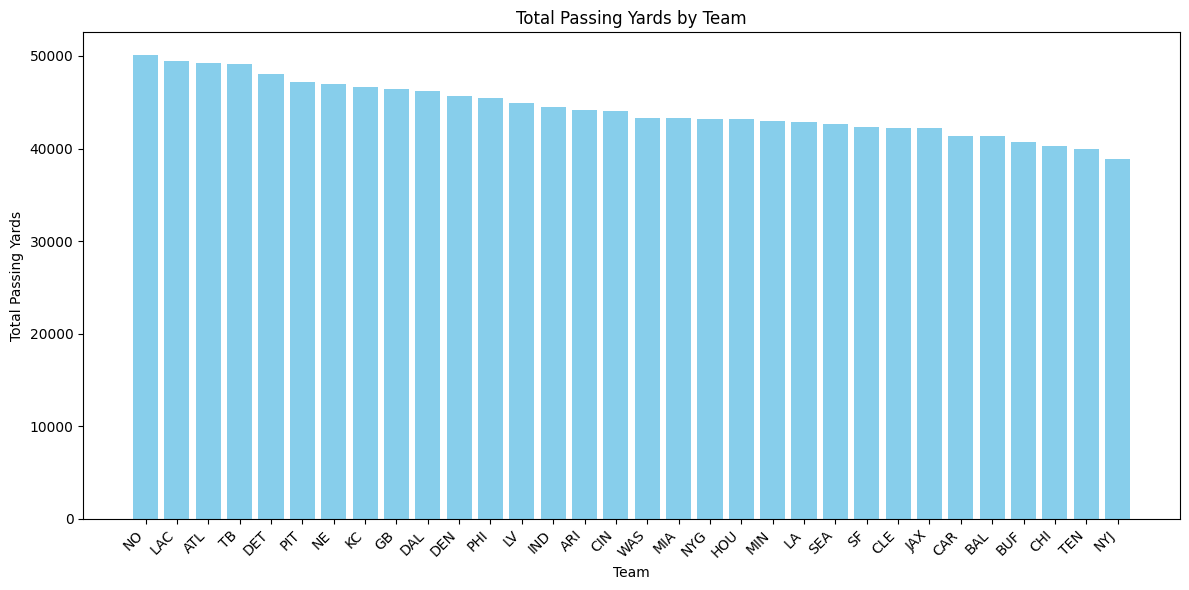

In [23]:
team_passing_yards = data.groupby('team')['passing_yards'].sum().reset_index()
team_passing_yards = team_passing_yards.sort_values(by='passing_yards', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(team_passing_yards['team'], team_passing_yards['passing_yards'], color='skyblue')
plt.title('Total Passing Yards by Team')
plt.xlabel('Team')
plt.ylabel('Total Passing Yards')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

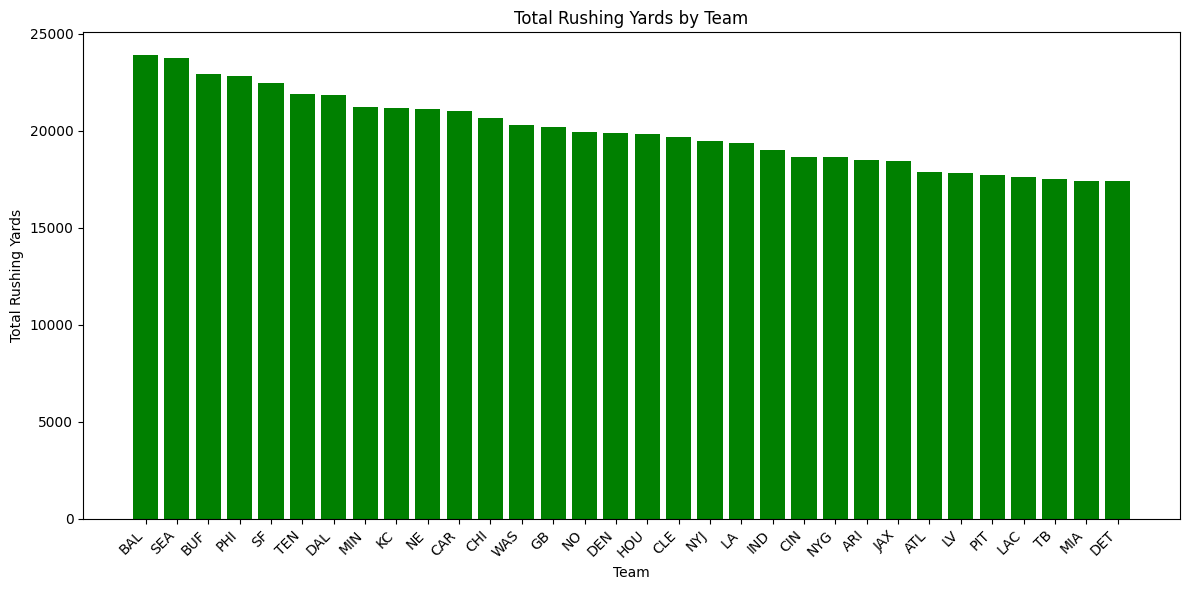

In [24]:
team_rushing_yards = data.groupby('team')['rushing_yards'].sum().reset_index()
team_rushing_yards = team_rushing_yards.sort_values(by='rushing_yards', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(team_rushing_yards['team'], team_rushing_yards['rushing_yards'], color='green')
plt.title('Total Rushing Yards by Team')
plt.xlabel('Team')
plt.ylabel('Total Rushing Yards')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

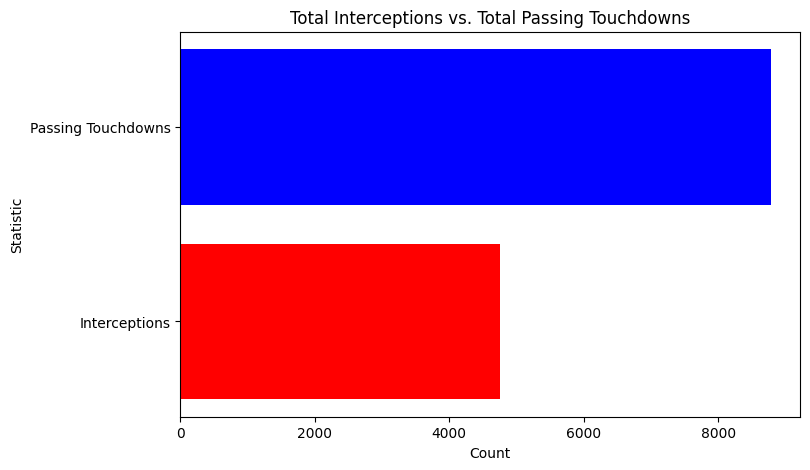

In [29]:
qb_stats = data[data['position'] == 'QB'][['interceptions', 'passing_tds']]
total_interceptions = qb_stats['interceptions'].sum()
total_passing_touchdowns = qb_stats['passing_tds'].sum()
plt.figure(figsize=(8, 5))
plt.barh(['Interceptions', 'Passing Touchdowns'], [total_interceptions, total_passing_touchdowns], color=['red', 'blue'])
plt.title('Total Interceptions vs. Total Passing Touchdowns')
plt.xlabel('Count')
plt.ylabel('Statistic')
plt.show()

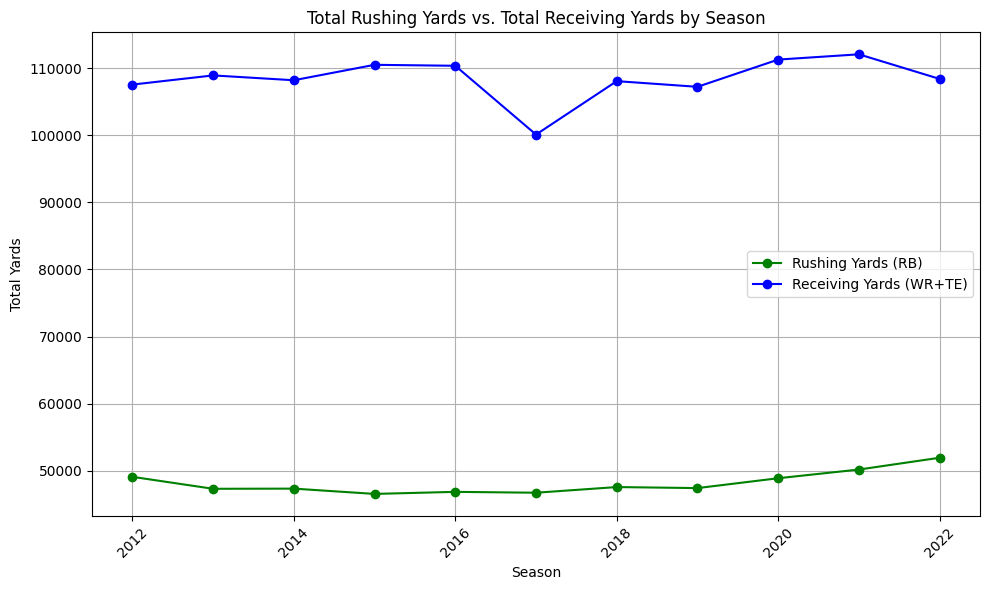

In [33]:
rb_data = data[data['position'] == 'RB']
wr_te_data = data[data['position'].isin(['WR', 'TE'])]
rb_season_totals = rb_data.groupby('season')['rushing_yards'].sum().reset_index()
wr_te_season_totals = wr_te_data.groupby('season')['receiving_yards'].sum().reset_index()
merged_data = pd.merge(rb_season_totals, wr_te_season_totals, on='season', suffixes=('_rb', '_wr_te'))
plt.figure(figsize=(10, 6))
plt.plot(merged_data['season'], merged_data['rushing_yards'], marker='o', label='Rushing Yards (RB)', color='green')
plt.plot(merged_data['season'], merged_data['receiving_yards'], marker='o', label='Receiving Yards (WR+TE)', color='blue')
plt.title('Total Rushing Yards vs. Total Receiving Yards by Season')
plt.xlabel('Season')
plt.ylabel('Total Yards')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Creating visualizations such as bar plots and line graphs helped me to better understand my data by providing clear and intuitive representations of key statistics. Comparing metrics like rushing yards for running backs versus receiving yards for wide receivers and tight ends over different seasons allowed me to quickly identify trends and patterns, which also helps people to draft Fantasy teams as well as predict future real season outcomes. Similarly, visualizing statistics such as interceptions versus passing touchdowns for quarterbacks enabled me to make immediate comparisons and gain insights into player performance. Overall, these visualizations enhanced my understanding of the dataset and facilitated data-driven decision-making.